## ISEL - 5º Semestre 2024/25

#### <br>
# <center> Aprendizagem Automática (AA) </center>
##  <center> 1º Trabalho Laboratorial </center>
### <center> Pima Indians Diabetes Dataset </center>
#### </br>

### Grupo:
* Hugo Sousa, número <b> 46104 </b>
* João Fonseca, número <b> 49707 </b>
* Guilherme Vicente, número <b> 50745 </b>

### Docente:
* Engenheiro Gonçalo Marques

<b>Data de Entrega:</b> 17/11/2024

<b>Enunciado:</b> https://2425moodle.isel.pt/pluginfile.php/1261300/mod_resource/content/1/pimaDiabetesEnunciado_24-25.pdf

---

<a id="indice"></a>
# Índice

- [Introdução](#intro)
- [Imports](#imp)
- [Desenvolvimento](#desenv)
    - [Preparação e Estudo dos Dados](#prep)
    - [Treino e Avaliação dos Modelos](#treino_aval)
    - [Comparação dos Modelos](#mods)
- [Conclusões](#conc)
- [Bibliografia](#bib)

---

<a id="intro"></a>
# Introdução

Este trabalho tem como objetivo o desenvolvimento de um modelo de classificação binária para prever a ocorrência de diabetes em pacientes do *Pima Indians Diabetes Dataset*, com base em características médicas e pessoais. Para isso, serão explorados e comparados três classificadores, incluindo o $\texttt{RandomForestClassifier}$, de forma a avaliar o seu desempenho utilizando métricas apropriadas e metodologias robustas de treino e validação.

A análise incluirá o pré-processamento dos dados, o ajuste de hiperparâmetros e a comparação dos modelos quanto à capacidade preditiva. Este estudo procura não apenas identificar o melhor classificador, mas também entender como diferentes abordagens influenciam os resultados obtidos.

---

<a id="imp"></a>
# Imports

In [43]:
import numpy as np
import matplotlib.pyplot as plt
import pickle
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.metrics import confusion_matrix, roc_curve, auc, accuracy_score, precision_score, recall_score, f1_score, classification_report
from sklearn.preprocessing import StandardScaler, MinMaxScaler

---

<a id="desenv"></a>
# Desenvolvimento

Serão treinados e avaliados três classificadores binários:
- $\texttt{Support Vector Machine (SVM)}$: é um algoritmo que procura encontrar o melhor vetor que separa as classes nos dados de forma ótima, maximizando a margem entre os pontos mais próximos (vetores de suporte). Ele pode lidar com dados de forma linear e não linear.
- $\texttt{Linear Regression}$: é um algoritmo de aprendizagem amplamente utilizado em qualquer tarefa que necessite de encontrar uma relação linear entre variáveis (entrada) e procura encontrar uma variável continua (saída) através de uma equação linear.
- $\texttt{Random Forest Classifier}$: é um algoritmo de aprendizagem supervisionado que combina várias árvores de decisão independentes para realizar tarefas de classificação. Cada árvore é treinada num subconjunto diferente dos dados (técnica de bagging), e a previsão final é determinada pela votação maioritária entre as árvores. Esse método reduz o risco de overfitting e melhora a capacidade de generalização do modelo.

<a id="prep"></a>
## Preparação e Estudo dos Dados

In [45]:
D = pickle.load(open('pimaDiabetes.p','rb'))
D.keys()

dict_keys(['data', 'target', 'feature_names', 'DESCR'])

In [46]:
X = D['data'] # características para cada mulher
y = D['target'] # presença (1) ou ausência (0) de diabetes

In [47]:
print(f"Número de amostras: {X.shape[0]} mulheres\nNúmero de características: {X.shape[1]}")

Número de amostras: 768 mulheres
Número de características: 8


In [48]:
# Dados (exemplo para primeira mulher)
print("Características da primeira mulher no dataset:\n")
for j, value in enumerate(X[0]):
    print(f"{feature_names[j]}: {value}")

Características da primeira mulher no dataset:

Number of times pregnant: 6.0
Plasma glucose concentration at 2 Hours in an oral glucose tolerance test (GTIT): 148.0
Diastolic Blood Pressure (mm Hg): 72.0
Triceps skin fold thickness (mm): 35.0
2-Hour Serum insulin (µh/ml): 0.0
Body mass index [weight in kg/(Height in m)]: 33.6
Diabetes pedigree function: 0.627
Age (years): 50.0


In [49]:
msd = X[y == 0] # mulheres sem diabetes

mcd = X[y == 1] # mulheres com diabetes

print(f"Mulheres sem diabetes: {msd.shape}")
print(f"Mulheres com diabetes: {mcd.shape}")

Mulheres sem diabetes: (500, 8)
Mulheres com diabetes: (268, 8)


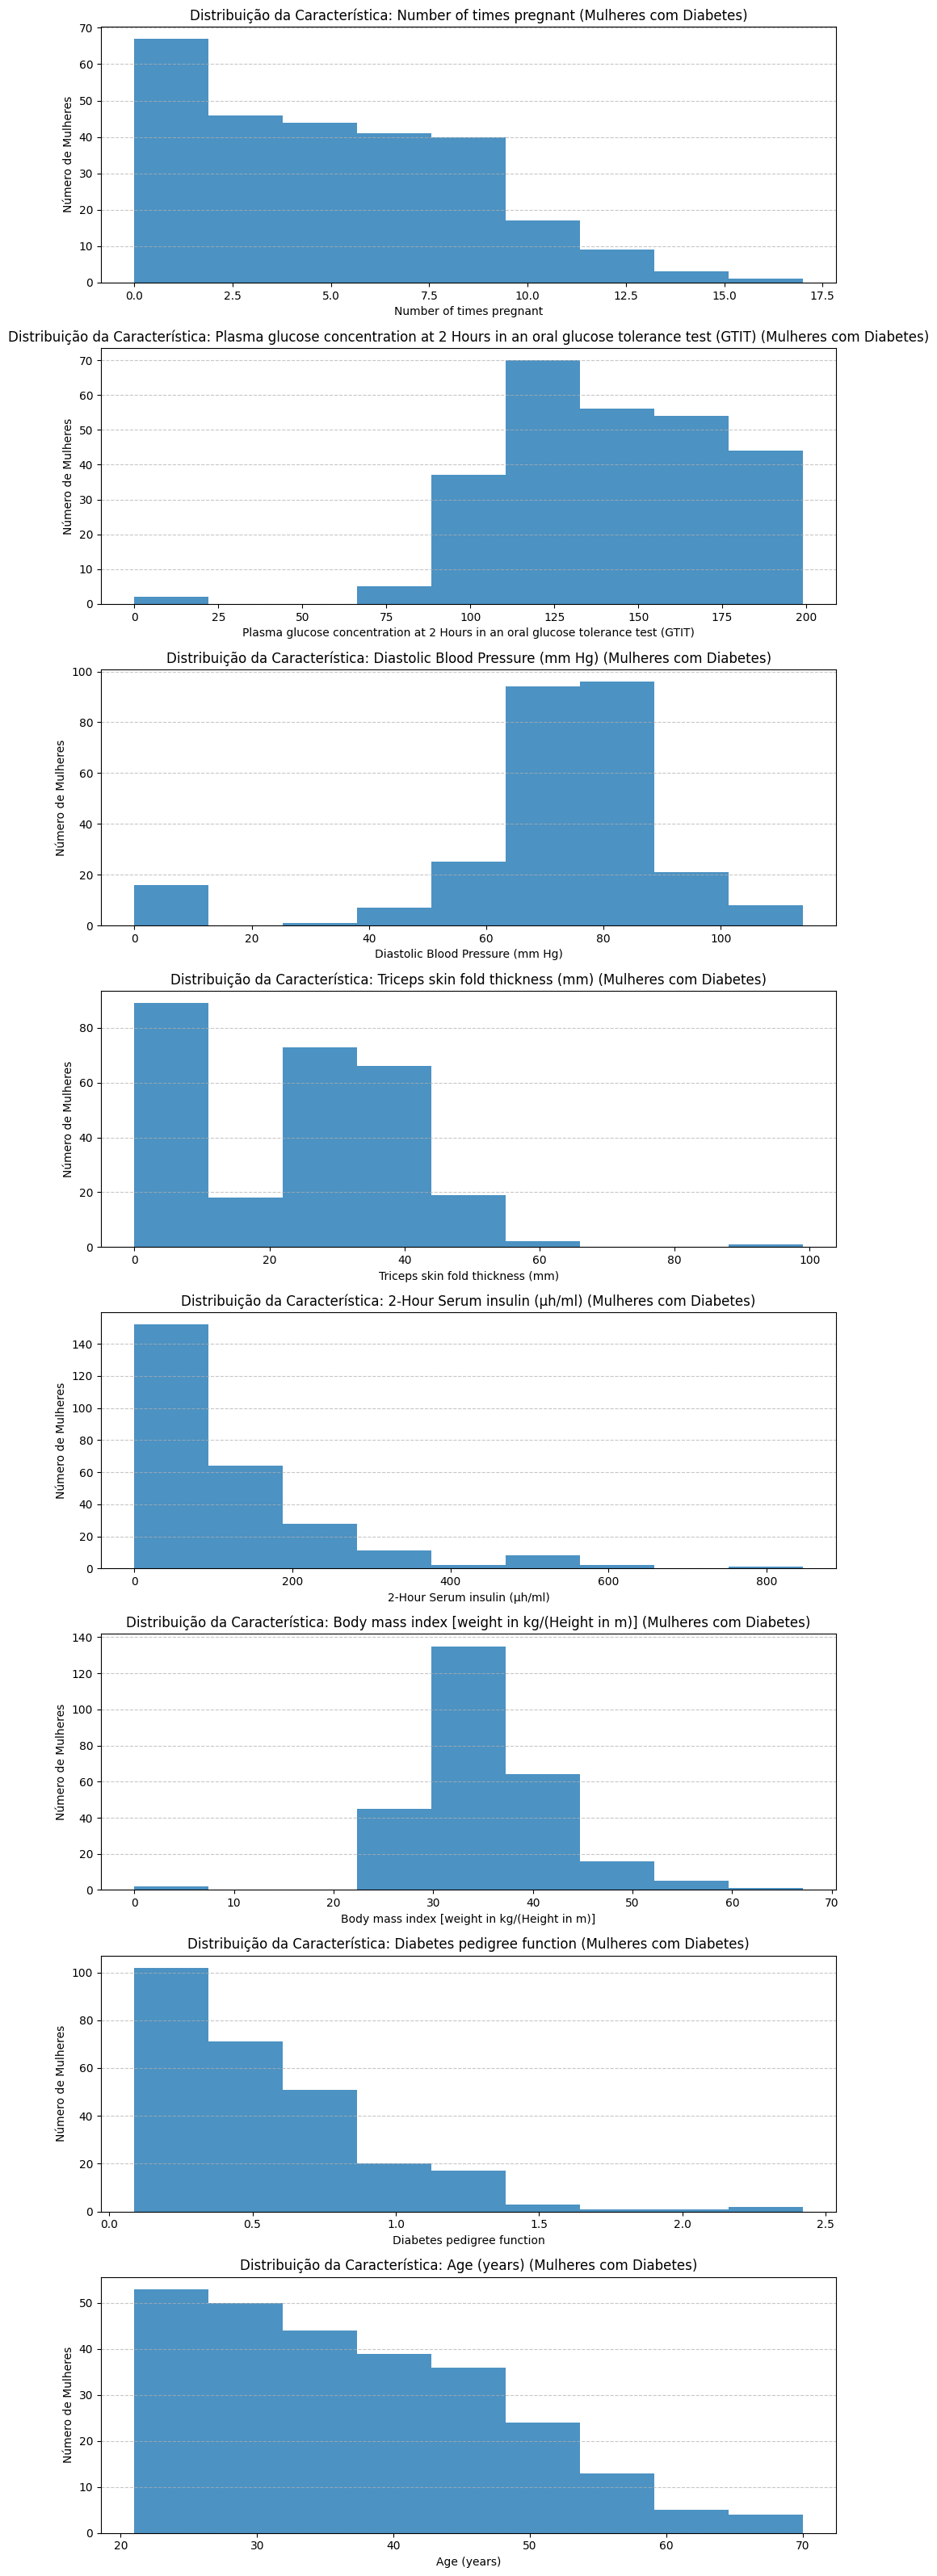

In [50]:
# Layout para múltiplos gráficos
num_features = X.shape[1]
fig, axes = plt.subplots(nrows=num_features, ncols=1, figsize=(10, 4 * num_features))

# Gerar gráficos para cada característica
for i in range(num_features):
    feature_values = mcd[:, i]  # Valores da característica para mulheres com diabetes
    
    bins = np.linspace(feature_values.min(), feature_values.max(), 10)
    counts, _ = np.histogram(feature_values, bins=bins)
    
    axes[i].bar(bins[:-1], counts, width=(bins[1] - bins[0]), alpha=0.8, align='edge')
    axes[i].set_title(f'Distribuição da Característica: {feature_names[i]} (Mulheres com Diabetes)')
    axes[i].set_xlabel(feature_names[i])
    axes[i].set_ylabel('Número de Mulheres')
    axes[i].grid(axis='y', linestyle='--', alpha=0.7)

plt.tight_layout()
plt.show()


A necessidade de divisão dos dados em **conjunto de treino** e **conjunto de teste** é uma prática essencial para garantir que o modelo seja avaliado com dados que não foram vistos durante o treino, fornecendo uma medida confiável do seu desempenho. O conjunto de teste permite verificar como o modelo se comporta em dados desconhecidos, simulando situações do mundo real.  
- Conjunto de treino (2/3 dos dados): (X_train,y_train)
- Conjunto de teste (1/3 dos dados): (X_test,y_test)

In [51]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=1/3, stratify=y, random_state=42)
print(f"O conjunto de treino (X_train) tem {X_train.shape[0]} amostras, cada uma com {X_train.shape[1]} características.")
print(f"O conjunto de teste (X_test) tem {X_test.shape[0]} amostras, cada uma com {X_test.shape[1]} características.")

O conjunto de treino (X_train) tem 512 amostras, cada uma com 8 características.
O conjunto de teste (X_test) tem 256 amostras, cada uma com 8 características.


### Função calculate_metrics()
Função auxiliar para calcular as métricas a partir da matriz de confusão.

In [52]:
def calculate_metrics(conf_matrix):
    """
    Calcula accuracy, precision, recall e F1-score a partir da matriz de confusão.
    
    Args:
        conf_matrix (numpy array): Matriz de confusão (2x2).
    
    Returns:
        tuple: (acc, prec, rec, f1_s)
    """
    # Extrair valores da matriz de confusão
    tp = conf_matrix[1, 1]  # Verdadeiros Positivos
    fp = conf_matrix[0, 1]  # Falsos Positivos
    fn = conf_matrix[1, 0]  # Falsos Negativos
    tn = conf_matrix[0, 0]  # Verdadeiros Negativos
    
    # Cálculo das métricas
    acc  = (tp + tn) / (tp + fp + fn + tn) if (tp + fp + fn + tn) > 0 else 0 # accuracy
    prec = tp / (tp + fp) if (tp + fp) > 0 else 0                            # precision
    rec  = tp / (tp + fn) if (tp + fn) > 0 else 0                            # recall
    f1_s = 2 * (prec * rec) / (prec + rec) if (prec + rec) > 0 else 0        # f1-score
    
    return acc, prec, rec, f1_s

### Função display_metrics()
Função auxiliar para fazer display das métricas numa tabela.

In [53]:
def display_metrics(accuracy, precision, recall, f1_score):
    """
    Exibe as métricas fornecidas
    
    Args:
        accuracy (float): Taxa de acertos.
        precision (float): Precisão do modelo.
        recall (float): Recall do modelo.
        f1_score (float): F1-Score do modelo.
    """
    print("+------------+---------+")
    print("|  Métrica   |  Valor  |")
    print("+------------+---------+")
    print(f"| Accuracy   |  {accuracy:.2f}   |")
    print(f"| Precision  |  {precision:.2f}   |")
    print(f"| Recall     |  {recall:.2f}   |")
    print(f"| F1-Score   |  {f1_score:.2f}   |")
    print("+------------+---------+")


---

### RANDOM FOREST CLASSIFIER

- Iniciamos o treinamento com parâmetros padrão para validar o funcionamento básico.  
- Usamos um número razoável de árvores (n_estimators=100) e limitamos a profundidade para evitar overfitting.

In [54]:
# Treino sem normalização
rf_no_scaling = RandomForestClassifier(random_state=42, n_estimators=100, max_depth=10)
rf_no_scaling.fit(X_train, y_train)

# Avaliação no conjunto de teste
y_pred_no_scaling = rf_no_scaling.predict(X_test)

# Avaliação sem normalização
conf_matrix_no_scaling = confusion_matrix(y_test, y_pred_no_scaling)
print("Matriz de Confusão (Sem Normalização):")
print(conf_matrix_no_scaling)
print()

# Cálculo das  métricas
acc_ns, prec_ns, rec_ns, fs_ns = calculate_metrics(conf_matrix_no_scaling)
display_metrics(acc_ns, prec_ns, rec_ns, fs_ns)

Matriz de Confusão (Sem Normalização):
[[137  30]
 [ 36  53]]

+------------+---------+
|  Métrica   |  Valor  |
+------------+---------+
| Accuracy   |  0.74   |
| Precision  |  0.64   |
| Recall     |  0.60   |
| F1-Score   |  0.62   |
+------------+---------+


In [55]:
# Funções do Sklearn
#accuracy_sklearn  = accuracy_score(y_test, y_pred_no_scaling)
#precision_sklearn = precision_score(y_test, y_pred_no_scaling)
#recall_sklearn    = recall_score(y_test, y_pred_no_scaling)
#f1_score_sklearn  = f1_score(y_test, y_pred_no_scaling)

# Comparação
#print(f"Accuracy (manual): {accuracy:.2f}, (sklearn): {accuracy_sklearn:.2f}")
#print(f"Precision (manual): {precision:.2f}, (sklearn): {precision_sklearn:.2f}")
#print(f"Recall (manual): {recall:.2f}, (sklearn): {recall_sklearn:.2f}")
#print(f"F1-Score (manual): {f1_manual:.2f}, (sklearn): {f1_score_sklearn:.2f}")

# Relatório de classificação sem normalização
#report_no_scaling = classification_report(y_test, y_pred_no_scaling, target_names=["Sem Diabetes", "Com Diabetes"])
#print("Relatório de Classificação (Sem Normalização):")
#print(report_no_scaling)

O cálculo das métricas através das funções auxiliares do sklearn eram diferentes dos cálculos feitos manualmente na função $\text{calculate_metrics()}$. Posto isto, utilizamos o cálculo manual como referência.

In [56]:
# Normalização dos dados
scaler = StandardScaler().fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_test_scaled  = scaler.transform(X_test)

In [57]:
# Treino com normalização
rf_scaled = RandomForestClassifier(random_state=42, n_estimators=100, max_depth=10)
rf_scaled.fit(X_train_scaled, y_train)

# Avaliação no conjunto de teste
y_pred_scaled = rf_scaled.predict(X_test_scaled)

# Avaliação com normalização
conf_matrix_scaled = confusion_matrix(y_test, y_pred_scaled)
print("Matriz de Confusão (Com normalização):")
print(conf_matrix_scaled)
print()

# Cálculo das métricas
acc_s, prec_s, rec_s, fs_s = calculate_metrics(conf_matrix_scaled)
display_metrics(acc_s, prec_s, rec_s, fs_s)

Matriz de Confusão (Com normalização):
[[137  30]
 [ 36  53]]

+------------+---------+
|  Métrica   |  Valor  |
+------------+---------+
| Accuracy   |  0.74   |
| Precision  |  0.64   |
| Recall     |  0.60   |
| F1-Score   |  0.62   |
+------------+---------+


Ao observar o cálculo das métricas, conclui-se que a normalização não trouxe melhorias ou mudanças no desempenho do modelo, não sendo benéfica para tal.  
Isto dá-se ao facto do RandomForestClassifier ser baseado em árvores de decisão, que são insensíveis à escala das variáveis. O que significa que a normalização não influencia a construção das árvores ou o desempenho do modelo. Essa insensibilidade ocorre porque as árvores de decisão dividem os dados com base em condições (ex.: maior ou menor que um valor específico), e não calculam distâncias ou operações que dependam da escala das variáveis.

O RandomForestClassifier tem diversos hiperparâmetros, mas os mais relevantes são:

- **n_estimators**: Número de árvores na floresta.
- **max_depth**: Profundidade máxima de cada árvore.
- **min_samples_split**: Número mínimo de amostras para dividir um nó.
- **min_samples_leaf**: Número mínimo de amostras para formar uma folha.
- **max_features**: Número de características consideradas para cada divisão.  

Estes parâmetros controlam o equilíbrio entre bias (subajuste) e variance (sobreajuste).

In [58]:
# Definir os hiperparâmetros para busca
# Valores que serão testados para cada hiperparametro
param_grid = {
    'n_estimators': [50, 100, 200], 
    'max_depth': [10, 20, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['sqrt', 'log2', None]
}

# Inicializar o modelo
rf = RandomForestClassifier(random_state=42)

# Configurar o GridSearchCV com 5 folds e F1-score
# cv=5 Realiza validação cruzada com 5 folds
# scoring='f1': Usa a métrica F1-score 
# n_jobs=-1: Usa todos os núcleos do processador para acelerar o processamento
grid_rf = GridSearchCV(estimator=rf, param_grid=param_grid, cv=5, scoring='f1', verbose=2, n_jobs=-1)
grid_rf.fit(X_train, y_train)

# Melhor combinação de hiperparâmetros
print("Melhores Hiperparâmetros:")
# Retorna os hiperparametros que obtiveram o melhor desempenho
print(grid_rf.best_params_)

# Treinar o modelo com os melhores hiperparâmetros
best_rf = grid_rf.best_estimator_
y_pred_optimized = best_rf.predict(X_test)

# Avaliação
conf_matrix_optimized = confusion_matrix(y_test, y_pred_optimized)
print("Matriz de Confusão (Modelo Otimizado):")
print(conf_matrix_optimized)

# Cálculo das métricas
acc_o, prec_o, rec_o, fs_o = calculate_metrics(conf_matrix_optimized)
display_metrics(acc_o, prec_o, rec_o, fs_o)

Fitting 5 folds for each of 243 candidates, totalling 1215 fits
Melhores Hiperparâmetros:
{'max_depth': 10, 'max_features': None, 'min_samples_leaf': 2, 'min_samples_split': 2, 'n_estimators': 200}
Matriz de Confusão (Modelo Otimizado):
[[142  25]
 [ 37  52]]
+------------+---------+
|  Métrica   |  Valor  |
+------------+---------+
| Accuracy   |  0.76   |
| Precision  |  0.68   |
| Recall     |  0.58   |
| F1-Score   |  0.63   |
+------------+---------+


Escolha dos Parâmetros a Otimizar:
- **n_estimators**: Mais árvores geralmente aumentam a precisão, mas também o custo computacional.
- **max_depth**: Limitar a profundidade evita sobreajuste, especialmente em datasets pequenos.
- **min_samples_split** e **min_samples_leaf**: Controlam o número mínimo de amostras necessárias para dividir um nó ou formar uma folha, ajudando a reduzir o sobreajuste.
- **max_features**: Determina quantos atributos considerar em cada divisão, equilibrando diversidade e precisão.

In [59]:
print("Modelo Inicial:")
display_metrics(acc_ns, prec_ns, rec_ns, fs_ns)
print('-'*25)
print("Modelo Otimizado:")
display_metrics(acc_o, prec_o, rec_o, fs_o)

Modelo Inicial:
+------------+---------+
|  Métrica   |  Valor  |
+------------+---------+
| Accuracy   |  0.74   |
| Precision  |  0.64   |
| Recall     |  0.60   |
| F1-Score   |  0.62   |
+------------+---------+
-------------------------
Modelo Otimizado:
+------------+---------+
|  Métrica   |  Valor  |
+------------+---------+
| Accuracy   |  0.76   |
| Precision  |  0.68   |
| Recall     |  0.58   |
| F1-Score   |  0.63   |
+------------+---------+


A partir dos resultados obtidos no modelo inicial e otimizado podem-se tirar as seguintes conclusões:  
- Accuracy: O modelo otimizado apresentou uma leve melhoria na taxa geral de acertos, mostrando uma maior capacidade a classificar corretamente os exemplos.
- Precision: O modelo otimizado é mais preciso, reduzindo o número de falsos positivos. Ou seja, quando ele prevê que há diabetes, a probabilidade de estar correto é maior.
- Recall: O modelo otimizado perdeu ligeiramente na capacidade de identificar todos os casos positivos (diabetes). Isso sugere um pequeno trade-off: o modelo ficou mais conservador ao identificar positivos, priorizando precisão sobre recall.
- F1-score: O F1-Score teve uma ligeira melhoria, indicando um equilíbrio ligeiramente melhor entre precisão e recall no modelo otimizado.

**Modelo Inicial**:  
- Recall (0.60) é maior do que no modelo otimizado (0.58), o que significa que deteta mais casos verdadeiros de diabetes.
- Precision (0.64) é menor, indicando que ele comete mais erros ao classificar como "diabetes" quem não tem.

**Modelo Otimizado**:
- Precision (0.68) é maior, ou seja, ele é mais confiável ao prever casos positivos.
- Recall (0.58) é ligeiramente menor, indicando que ele deixa passar alguns casos verdadeiros que o modelo inicial detetava.
- Melhorou em Accuracy e F1-Score.

Então, se o foco for detetar o máximo de casos positivos (priorizar o recall), a melhor abordagem seria escolher o **modelo inicial**, uma vez que esteé mais eficaz em identificar casos verdadeiros positivos, mesmo que gere mais falsos positivos.  
Caso o foco seja minimizar o número de falsos positivos (priorizar a precisão), seria melhor optar pelo **modelo otimizado**, uma vez que este reduz falsos alarmes, tornado as previsões de positivos mais confiáveis.  
Se o objetivo for um equilíbrio em geral, o **modelo otimizado** apresenta um F1-Score ligeiramente maior, indicando uma maior harmonia entre precisão e recall.

Quando não há um objetivo claro, a melhor abordagem é gerar a curva ROC, que avalia a performance global do modelo para diferentes thresholds, e ajustar os thresholds que atendam ao objetivo (ex: maximizar recall ou precisão) e encontrem o melhor ponto de equilíbrio.  

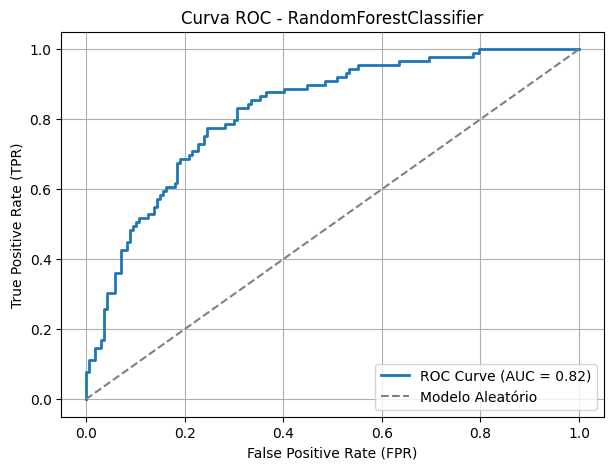

In [60]:
# Obter as probabilidades para a classe positiva (1 - Com Diabetes)
y_proba = best_rf.predict_proba(X_test)[:, 1]

# Calcular FPR, TPR e thresholds
fpr, tpr, thresholds = roc_curve(y_test, y_proba)

# Calcular a área sob a curva ROC (AUC)
roc_auc = auc(fpr, tpr)

# Plot da Curva ROC
plt.figure(figsize=(7, 5))
plt.plot(fpr, tpr, label=f'ROC Curve (AUC = {roc_auc:.2f})', linewidth=2)
plt.plot([0, 1], [0, 1], color='gray', linestyle='--', label="Modelo Aleatório")  # Linha de referência
plt.xlabel('False Positive Rate (FPR)')
plt.ylabel('True Positive Rate (TPR)')
plt.title('Curva ROC - RandomForestClassifier')
plt.legend(loc="lower right")
plt.grid()
plt.show()

- **FPR (False Positive Rate)**(eixo X): 
  - Representa a proporção de falsos positivos em relação ao total de negativos.
  - Valores mais altos indicam que o modelo comete mais erros ao classificar negativos como positivos.
  - Sobe lentamente no início da curva, o que significa que o modelo com thresholds baixos consegue capturar muitos verdadeiros positivos sem errar muito nos negativos.
- **TPR (True Positive Rate)**(eixo Y):
  - Representa a proporção de verdadeiros positivos em relação ao total de positivos (recall).
  - Valores mais altos indicam que o modelo está a identificar mais casos verdadeiros positivos.
  - Aproxima-se de 1 à medida que o threshold aumenta, o que é ideal.
  
- **AUC (Area Under Curve)** = 0.82:
  - AUC = 1 - Modelo Perfeito; AUC = 0.5 - Modelo Aleatório
  - Indica que o modelo tem 82% de chance de distinguir corretamente entre as classes "Com Diabetes" e "Sem Diabetes".
  
- Podemos observar que a curva ROC se encontra acima da diagonal, indicando um comportamento significativamente melhor do que o aleatório.
- A curva aproxima-se do canto superior esquerdo (FPR próximo de 0, TPR próximo de 1), o que indica que o modelo pode alcançar um bom recall (alta deteção de positivos) com uma baixa taxa de falsos positivos.
  
A escolha dos thresholds ideais depende da prioridade do problema. Com base na curva ROC:
- **Priorizar Recall (Maximizar TPR)**:
  - **Threshold baixo (ex: 0.2 ou 0.3)**, onde o TPR é alto. Detetar todos os casos positivos (ex: identificar todos os casos de diabetes).
  - É útil em situações onde perder um positivo tem um custo elevado (ex: um paciente não diagnosticado).
  - Por outro lado, mais pessoas podem ser classificadas como "Com Diabetes", mesmo que algumas estejam saudáveis. 
- **Priorizar Precisão (Reduzir Falsos Positivos)**:
  - **Threshold alto (ex: 0.7 ou 0.8)**, onde o FPR é baixo. Garantir que a predição "Com Diabetes" seja o mais confiável possível.
  - É útil em cenários onde falsos positivos têm um impacto negativo (ex: tratamentos desnecessários).
  - Menos pessoas são diagnosticadas como "Com Diabetes", mas as que são, têm maior probabilidade de realmente estarem doentes.
- **Maior equilíbrio (Compromisso entre TPR e FPR)**: 
  - **Threshold médio (ex: 0.4 ou 0.5)**, onde a curva ROC esteja mais afastada da diagonal, para maximizar o F1-Score.

Thresholds e métricas associadas:
Threshold: 0.2
+------------+---------+
|  Métrica   |  Valor  |
+------------+---------+
| Accuracy   |  0.67   |
| Precision  |  0.52   |
| Recall     |  0.89   |
| F1-Score   |  0.65   |
+------------+---------+
------------------------------
Threshold: 0.3
+------------+---------+
|  Métrica   |  Valor  |
+------------+---------+
| Accuracy   |  0.73   |
| Precision  |  0.58   |
| Recall     |  0.83   |
| F1-Score   |  0.68   |
+------------+---------+
------------------------------
Threshold: 0.4
+------------+---------+
|  Métrica   |  Valor  |
+------------+---------+
| Accuracy   |  0.76   |
| Precision  |  0.63   |
| Recall     |  0.75   |
| F1-Score   |  0.68   |
+------------+---------+
------------------------------
Threshold: 0.5
+------------+---------+
|  Métrica   |  Valor  |
+------------+---------+
| Accuracy   |  0.76   |
| Precision  |  0.68   |
| Recall     |  0.58   |
| F1-Score   |  0.63   |
+------------+---------+
-------------

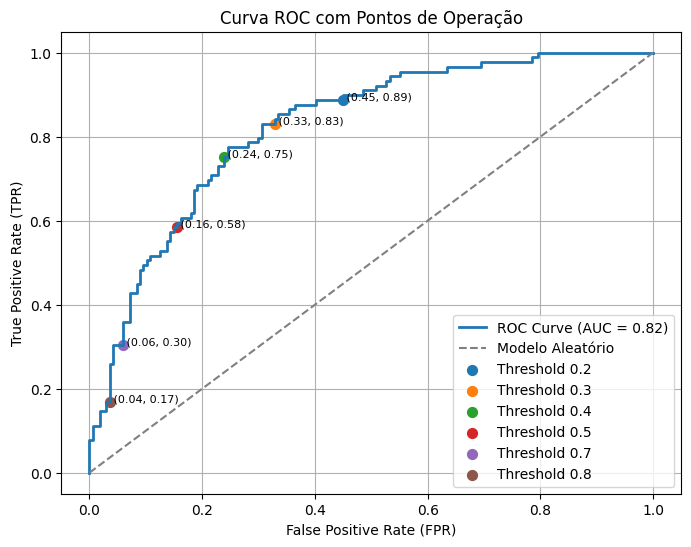

In [61]:
# Testar diferentes thresholds
thresholds_test = [0.2, 0.3, 0.4, 0.5, 0.7, 0.8]

# Plot da curva ROC
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f'ROC Curve (AUC = {roc_auc:.2f})', linewidth=2)
plt.plot([0, 1], [0, 1], color='gray', linestyle='--', label="Modelo Aleatório")  # Linha de referência

print("Thresholds e métricas associadas:")
for t in thresholds_test:
    # Obter as predições binárias para o threshold
    y_pred_thresh = (y_proba >= t).astype(int)
    
    # Matriz de confusão
    conf_matrix = confusion_matrix(y_test, y_pred_thresh)
    
    # Calcular métricas usando funções do scikit-learn
    #accuracy_t  = accuracy_score(y_test, y_pred_thresh)
    #precision_t = precision_score(y_test, y_pred_thresh)
    #recall_t    = recall_score(y_test, y_pred_thresh)
    #f1_score_t  = f1_score(y_test, y_pred_thresh)
    
    # Calcular métricas
    accuracy_t, precision_t, recall_t, f1_score_t = calculate_metrics(conf_matrix)
    
    # Exibir métricas
    print(f"Threshold: {t}")
    display_metrics(accuracy_t, precision_t, recall_t, f1_score_t)
    print("-" * 30)
    
    # Adicionar ponto operacional no gráfico ROC
    # Encontrar o índice correspondente ao threshold na curva ROC
    index = np.argmin(np.abs(thresholds - t))
    plt.scatter(fpr[index], tpr[index], label=f"Threshold {t:.1f}", s=50)
    plt.text(fpr[index], tpr[index], f" ({fpr[index]:.2f}, {tpr[index]:.2f})", fontsize=8)

# Configurar o gráfico
plt.xlabel('False Positive Rate (FPR)')
plt.ylabel('True Positive Rate (TPR)')
plt.title('Curva ROC com Pontos de Operação')
plt.legend(loc="lower right")
plt.grid()
plt.show()

- **Threshold = 0.2**:
  - Ideal para cenários onde o objetivo é detetar todos os casos de diabetes (priorizar recall), mesmo que isso leve a falsos positivos.
- **Threshold = 0.3**:
  - Um bom compromisso entre recall e precisão, mas ainda a dar prioridade à a deteção de casos positivos.
- **Threshold = 0.4**:
  - Melhor compromisso geral, equilibrando precisão e recall.
- **Threshold = 0.5**:
  - Adequado para cenários onde minimizar falsos positivos é mais importante (priorizar precisão).
- **Threshold = 0.7**:
  - Ideal para cenários onde é crucial evitar falsos positivos, mas aceita-se perder casos positivos.
- **Threshold = 0.8**:
  - Adequado apenas para cenários onde é fundamental evitar falsos positivos, com alto custo de perder casos positivos.
  
- O gráfico mostra que o modelo tem um bom desempenho geral, com um AUC = 0.82.
- Os pontos operacionais ajudam a visualizar o impacto de cada threshold na relação entre TPR (Recall) e FPR (Taxa de Falsos Positivos). 

---

### SUPPORT VECTOR MACHINE

In [62]:
# NORMALIZAÇÃO:
# StandardScaler: Remove a média e escala os dados para ter desvio padrão 1
# fit_transform: Ajusta o scaler ao conjunto de treino e transforma os dados
X_scaler = StandardScaler().fit_transform(X_train) 
np.mean(X_scaler) 

4.822531263215524e-16

In [63]:
# teste para ver quais sao os melhores hiper parametros
param_grid = {
    'C':[0.1,1],
    'gamma': [1,0.1,0.01,0.001],
    'kernel':['rbf','linear']
}

# CLASSIFICADOR: SUPPORT VECTOR MACHINE (SVM)
svm_model = SVC()

grid = GridSearchCV(estimator=svm_model,param_grid=param_grid,cv=5,scoring='f1',verbose=2)
grid.fit(X_scaler,y_train)

print("\n",grid.best_params_)

Fitting 5 folds for each of 16 candidates, totalling 80 fits
[CV] END .........................C=0.1, gamma=1, kernel=rbf; total time=   0.0s
[CV] END .........................C=0.1, gamma=1, kernel=rbf; total time=   0.0s
[CV] END .........................C=0.1, gamma=1, kernel=rbf; total time=   0.0s
[CV] END .........................C=0.1, gamma=1, kernel=rbf; total time=   0.0s
[CV] END .........................C=0.1, gamma=1, kernel=rbf; total time=   0.0s
[CV] END ......................C=0.1, gamma=1, kernel=linear; total time=   0.0s
[CV] END ......................C=0.1, gamma=1, kernel=linear; total time=   0.0s
[CV] END ......................C=0.1, gamma=1, kernel=linear; total time=   0.0s
[CV] END ......................C=0.1, gamma=1, kernel=linear; total time=   0.0s
[CV] END ......................C=0.1, gamma=1, kernel=linear; total time=   0.0s
[CV] END .......................C=0.1, gamma=0.1, kernel=rbf; total time=   0.0s
[CV] END .......................C=0.1, gamma=0.1

param_grid: Define combinações de hiperparâmetros a serem testadas:
- C: Controla a penalização por erros na separação de classes.
- gamma: Controla a influência de cada ponto no kernel.
- kernel: Tipo de kernel (ex.: radial básico rbf ou linear).  


GridSearchCV: Realiza uma busca por hiperparâmetros ótimos com validação cruzada de 5 folds.  
scoring='f1': Usa a métrica F1 para selecionar os melhores hiperparâmetros.

In [64]:
# divisão dos dados em conjunto de treino e conjunto de validação
X1train, X1val, y1train, y1val = train_test_split(X, y, test_size=1/2, stratify=y, random_state=42)

stsc = StandardScaler(with_mean=False).fit(X) # Normaliza os dados sem subtrair a média
X1t = stsc.transform(X1train)
X1v = stsc.transform(X1val)

In [65]:
# treino do modelo svm com kernel linear, penalização c=0.01 e parâmetro gamma=1
svm = SVC(kernel="linear", C=0.1, gamma=1)  
svm.fit(X1t, y1train)
y2e = svm.predict(X1v) # previsões no conjunto de validação 

In [66]:
# Matriz de confusão:
mc = confusion_matrix(y1val, y2e)
tp, fp, fn, tn = mc[0, 0], mc[0, 1], mc[1, 0], mc[1, 1]
print("Matriz de confusão: \n",mc)

Matriz de confusão: 
 [[216  34]
 [ 60  74]]


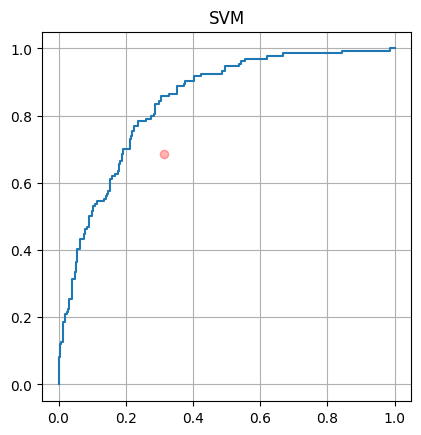

In [67]:
# Curva ROC:
# calcula os valores de FPR (False Positive Rate) e TPR (True Positive Rate) para fazer plot da curva ROC
dec_func_svm = svm.decision_function(X1v) # gera as pontuações usadas para prever classes
fp1, tp1, _ = roc_curve(y1val, dec_func_svm) 
d1 = fp/(fp+tn)  
d2 = tn/(tn+fp) 

plt.plot(d1, d2, 'or', alpha=0.3)  # ponto operacional
plt.plot(fp1, tp1)  
plt.title("SVM")
plt.grid()
plt.axis('scaled')
plt.show()


In [68]:
# Avaliação com diferentes thresholds:
thresholds = [0, -0.8, -0.7,-0.5]

for threshold in thresholds:
    new_mc    = confusion_matrix(y1val, (dec_func_svm >= threshold).astype(int)) 

    accuracy  = accuracy_score(y1val, (dec_func_svm >= threshold).astype(int))
    precision = precision_score(y1val, (dec_func_svm >= threshold).astype(int))
    recall    = recall_score(y1val, (dec_func_svm >= threshold).astype(int))
    f1        = f1_score(y1val,  (dec_func_svm >= threshold).astype(int))
    
   
    print(f"Threshold = {threshold}")
    print("Confusion Matrix:")
    print(new_mc)
    print(f"Accuracy: {accuracy:.2f}")
    print(f"Precision: {precision:.2f}")
    print(f"Recall: {recall:.2f}")
    print(f"F1 Score: {f1:.2f}")
    print("-" * 30)


Threshold = 0
Confusion Matrix:
[[216  34]
 [ 60  74]]
Accuracy: 0.76
Precision: 0.69
Recall: 0.55
F1 Score: 0.61
------------------------------
Threshold = -0.8
Confusion Matrix:
[[162  88]
 [ 17 117]]
Accuracy: 0.73
Precision: 0.57
Recall: 0.87
F1 Score: 0.69
------------------------------
Threshold = -0.7
Confusion Matrix:
[[177  73]
 [ 22 112]]
Accuracy: 0.75
Precision: 0.61
Recall: 0.84
F1 Score: 0.70
------------------------------
Threshold = -0.5
Confusion Matrix:
[[194  56]
 [ 31 103]]
Accuracy: 0.77
Precision: 0.65
Recall: 0.77
F1 Score: 0.70
------------------------------


Avalia o modelo para diferentes limiares, ajustando a sensibilidade e especificidade.  
Métricas calculadas:
- Exatidão: Proporção de previsões corretas 
- Precisão: Proporção de positivos previstos que são verdadeiros
- Recall: Proporção de verdadeiros positivos recuperados  
- F1-Score: Média harmónica entre precisão e recall

---

<a id="mods"></a>
## Comparação dos Modelos

---

<a id="conc"></a>
# Conclusões
**Random Forest**: Escolhido por ser robusto a ruídos, lidar bem com dados mistos e oferecer boa interpretabilidade.
  - Divisão Treino/Teste:
    - Garante estimativa confiável do desempenho com proporção de classes preservada.
  - Normalização:
    - Investigada para verificar se impacta o modelo, pois Random Forest, teoricamente, é menos sensível a escalas.
  - Métricas:
    - Matriz de confusão e classificação detalhada fornecem uma visão clara do desempenho geral e por classe.

**Linear Regression**: Escolhido pela sua simplicidade, eficiência em problemas com relação linear e oferecer boa interpretabilidade.
  - Divisão Treino/Teste:
    - Grante estimativas confiáveis do desempenho do modelo com distribuição adequada dos dados para evitar overfitting.
  - Normalização:
    - Garante que cada caracteristica tem a mesma escala, já que a regressão linear é sensivel a diferentes escalas, afetando a magnitude dos coeficientes.
  - Métricas:
    - Avaliação com métricas como o Erro Quadrático Médio, o Erro Absoluto Médio para fornecer uma visão detalhada da qualidade da predição e precisão do modelo.

**Support Vector Machine**: Escolhido pela sua eficácia a encontrar fronteiras de decisão ótimas em problemas complexos.
  - Divisão Treino/Teste:
    - Grante uma avaliação robusta do desempenho com diferentes conjuntos de dados, garantindo assim a generalização.
  - Normalização:
    - É essencial pois o algoritmo é sensível à escala dos dados. Normalizar as variáveis melhora a eficiência do modelo e garante um cálculo mais preciso.
  - Métricas:
    - Matriz de confusão, precisão, recall, F1-score são métricas de desempenho fornecem uma análise da classificação do modelo, especialmente em problemas com classes múltiplas.

---

<a id="bib"></a>
# Bibliografia
* Slides das aulas
* Scikit-learn User Guide (https://scikit-learn.org/stable/user_guide.html)

* [Voltar ao início](#indice)

---